Link to the dataset in the Google drive is as follows:

https://drive.google.com/file/d/1IO0dRYh9upow_kuZ8mts3fJ_6Hmv9oCz/view?usp=share_link

In [31]:
#importing the required libraries that will be used in this project
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [118]:
#uploading the dataset, dropping the first two rows and creating the dataframes
words=pd.read_csv('/content/drive/MyDrive/Keyword_data - Keyword_data.csv')
words.drop([0,1],inplace=True)
words.index=words.index-2
words.drop(columns=["Title"],inplace=True)
for i in range(len(words.columns)):
  for j in range(len(words)):
    if(pd.isna(words.iloc[j,i])):
      continue
    else:
      words.iloc[j,i]=words.iloc[j,i].upper()
keywords=[]
for i in range(0,len(words.columns)):
  keywords=keywords+list(words.iloc[:,i].values)
key_set=list(set(keywords))
#removing the null values from the matrix
for i in key_set:
  if(pd.isna(i)):
    key_set.remove(i)
    break
key_set.sort()
zero_data = np.zeros(shape=(len(key_set),len(key_set)))
#creating the adjacency matrix
adj_df = pd.DataFrame(zero_data, columns=key_set)
adj_df.index=key_set

In [119]:
#printing the original keyword dataframe
words

,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
0,EQUITY,ORGANIZATIONAL SOCIOLOGY,PERFORMANCE,META-ANALYSIS,PSYCHOMETRICS,ORGANIZATIONAL RESEARCH,FINANCIAL PERFORMANCE,AGENCY THEORY,ORGANIZATIONAL EFFECTIVENESS,ORGANIZATIONAL BEHAVIOR,CORPORATE GOVERNANCE,NaN
1,DIVERSIFICATION IN INDUSTRY,BUSINESS PLANNING,PERFORMANCE STANDARDS,EMPLOYEES -- RATING OF,CORPORATE CULTURE,STRATEGIC PLANNING,ORGANIZATIONAL EFFECTIVENESS,MANAGEMENT SCIENCE,MANAGEMENT RESEARCH,PRODUCT MANAGEMENT,NaN,NaN
2,INTERORGANIZATIONAL RELATIONS,INTERGROUP RELATIONS,BUSINESS COMMUNICATION,INVESTMENTS,SUPPLY CHAINS,KNOWLEDGE MANAGEMENT,INTERORGANIZATIONAL NETWORKS,CORPORATE GOVERNANCE,GROUP DECISION MAKING,INTELLECTUAL CAPITAL,NaN,NaN
3,EXECUTIVE COMPENSATION,WAGES,HUMAN CAPITAL,LABOR ECONOMICS,PERSONNEL MANAGEMENT,MANAGEMENT SCIENCE,CONTINGENCY THEORY (MANAGEMENT),COMPENSATION MANAGEMENT,EXECUTIVE ABILITY (MANAGEMENT),CORPORATE GOVERNANCE,NaN,NaN
4,KNOWLEDGE MANAGEMENT,INFORMATION RESOURCES MANAGEMENT,MANAGEMENT INFORMATION SYSTEMS,BREAK-EVEN ANALYSIS,DATA MINING,MANAGEMENT SCIENCE,RESEARCH & DEVELOPMENT,RESEARCH & DEVELOPMENT CONTRACTS,CORPORATE GOVERNANCE,DECISION MAKING,ORGANIZATIONAL BEHAVIOR,TRANSACTION COSTS
...,...,...,...,...,...,...,...,...,...,...,...,...
59,INTERNATIONAL BUSINESS ENTERPRISES -- MANAGEMENT,FOREIGN SUBSIDIARIES -- MANAGEMENT,EMPLOYEE SELECTION,EXECUTIVES -- RECRUITING,ORGANIZATIONAL SOCIOLOGY,ORGANIZATIONAL BEHAVIOR,AGENCY THEORY,RESOURCE-BASED THEORY OF THE FIRM,PERSONNEL MANAGEMENT,EMPLOYMENT IN FOREIGN COUNTRIES,SUBSIDIARY CORPORATIONS -- MANAGEMENT,HOST COUNTRIES (BUSINESS)
60,PERSONNEL MANAGEMENT,COMPETITIVE ADVANTAGE,BUSINESS NETWORKS,INDUSTRIAL MANAGEMENT,STRATEGIC PLANNING,SOCIAL NETWORKS,RESOURCE MANAGEMENT,RESOURCE-BASED THEORY OF THE FIRM,HUMAN CAPITAL -- MANAGEMENT,INTELLECTUAL CAPITAL,DECISION MAKING,INDUSTRIAL EFFICIENCY
61,COMPENSATION MANAGEMENT,ORGANIZATIONAL BEHAVIOR,PERSONNEL MANAGEMENT,HOSPITALS -- ADMINISTRATION,MANAGEMENT,FINANCIAL PERFORMANCE,WAGE PAYMENT SYSTEMS,RESOURCE MANAGEMENT,ORGANIZATIONAL EFFECTIVENESS,INDUSTRIAL EFFICIENCY,FINANCIAL MANAGEMENT,INDUSTRIAL MANAGEMENT
62,CROSS-FUNCTIONAL TEAMS,TEAMS IN THE WORKPLACE,GROUP IDENTITY,ORGANIZATIONAL BEHAVIOR,MANAGEMENT,PERFORMANCE,PERSONNEL MANAGEMENT,COMPETITIVE ADVANTAGE,ORGANIZATIONAL EFFECTIVENESS,GROUP DECISION MAKING,ORGANIZATIONAL STRUCTURE,ORGANIZATIONAL SOCIOLOGY


In [120]:
#printing the total number of distinct keywords 
key_set

['AGENCY THEORY',
 'AGGRESSION (PSYCHOLOGY)',
 'AMBIVALENCE',
 'ANGER IN THE WORKPLACE',
 'BEHAVIORAL RESEARCH',
 'BOARDS OF DIRECTORS',
 'BREAK-EVEN ANALYSIS',
 'BURNOUT (PSYCHOLOGY)',
 'BUSINESS COMMUNICATION',
 'BUSINESS ENTERPRISES',
 'BUSINESS ENTERPRISES -- VALUATION',
 'BUSINESS MODELS',
 'BUSINESS NETWORKS',
 'BUSINESS PLANNING',
 'CAPITAL INVESTMENTS',
 'CAPITAL MARKET',
 'CAPITALISTS & FINANCIERS',
 'CHARISMATIC AUTHORITY',
 'CHIEF EXECUTIVE OFFICERS',
 'COMMERCIAL PRODUCTS',
 'COMPENSATION MANAGEMENT',
 'COMPETITIVE ADVANTAGE',
 'CONDUCT OF LIFE',
 'CONFLICT MANAGEMENT',
 'CONSOLIDATION & MERGER OF CORPORATIONS',
 'CONTAGION (SOCIAL PSYCHOLOGY)',
 'CONTINGENCY THEORY (MANAGEMENT)',
 'CORPORATE CULTURE',
 'CORPORATE GOVERNANCE',
 'CORPORATE IMAGE',
 'CORPORATIONS -- FINANCE',
 'CORPORATIONS -- INVESTOR RELATIONS',
 'CORPORATIONS -- PUBLIC RELATIONS',
 'CORPORATIONS -- VALUATION',
 'CREATIVE ABILITY',
 'CREATIVE ABILITY IN BUSINESS',
 'CRITICAL INCIDENT TECHNIQUE',
 'CRITICAL 

In [121]:
#converting the adj_df(adjacency matrix) to index
adj_df.index

Index(['AGENCY THEORY', 'AGGRESSION (PSYCHOLOGY)', 'AMBIVALENCE',
       'ANGER IN THE WORKPLACE', 'BEHAVIORAL RESEARCH', 'BOARDS OF DIRECTORS',
       'BREAK-EVEN ANALYSIS', 'BURNOUT (PSYCHOLOGY)', 'BUSINESS COMMUNICATION',
       'BUSINESS ENTERPRISES',
       ...
       'VIOLENCE IN THE WORKPLACE', 'WAGE PAYMENT SYSTEMS', 'WAGES',
       'WOMEN -- EMPLOYMENT', 'WOMEN EMPLOYEES', 'WORK & FAMILY',
       'WORK ATTITUDES', 'WORK ENVIRONMENT',
       'WORK ENVIRONMENT -- PSYCHOLOGICAL ASPECTS', 'WORKFLOW'],
      dtype='object', length=248)

In [122]:
def strength(w1,w2):
  count=0
  if w1==w2:
      return 0
  for z in range(0,len(words)):
    if ((w1 in list(words.iloc[int(z),:])) & (w2 in list(words.iloc[int(z),0:]))):
      count+=1
  return count

In [123]:
#filling the adjacency matrix
pair_words=list(itertools.combinations(key_set, 2))
for pair in pair_words:
  w1=pair[0]
  w2=pair[1]
  adj_df.loc[w1,w2]=strength(w1,w2)
  adj_df.loc[w2,w1]=adj_df.loc[w1,w2]

In [124]:
len(pair_words)

30628

In [125]:
#printing the adj_df(adjacency matrix)
adj_df

,AGENCY THEORY,AGGRESSION (PSYCHOLOGY),AMBIVALENCE,ANGER IN THE WORKPLACE,BEHAVIORAL RESEARCH,BOARDS OF DIRECTORS,BREAK-EVEN ANALYSIS,BURNOUT (PSYCHOLOGY),BUSINESS COMMUNICATION,BUSINESS ENTERPRISES,...,VIOLENCE IN THE WORKPLACE,WAGE PAYMENT SYSTEMS,WAGES,WOMEN -- EMPLOYMENT,WOMEN EMPLOYEES,WORK & FAMILY,WORK ATTITUDES,WORK ENVIRONMENT,WORK ENVIRONMENT -- PSYCHOLOGICAL ASPECTS,WORKFLOW
AGENCY THEORY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGGRESSION (PSYCHOLOGY),0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0
AMBIVALENCE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ANGER IN THE WORKPLACE,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
BEHAVIORAL RESEARCH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WORK & FAMILY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
WORK ATTITUDES,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
WORK ENVIRONMENT,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
WORK ENVIRONMENT -- PSYCHOLOGICAL ASPECTS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
#converting the adf_df to a matrix
mat=adj_df.to_numpy()

{(0, 5): Text(0.12974965341362474, -0.14454522356239405, '1.0'),
 (0, 28): Text(0.04799670326740568, 0.05186894684436261, '3.0'),
 (0, 30): Text(0.14465445094220933, 0.042410326506696454, '1.0'),
 (0, 45): Text(0.052277261557967636, -0.09632746050247447, '1.0'),
 (0, 47): Text(0.08584452298835021, -0.01734226995245353, '1.0'),
 (0, 50): Text(0.037406938264423685, -0.11690829823534782, '1.0'),
 (0, 57): Text(0.06955816070170556, -0.0916600229072323, '1.0'),
 (0, 60): Text(0.03279502367328835, -0.05474198037476799, '1.0'),
 (0, 66): Text(-0.005117641888315021, -0.09176684287034662, '1.0'),
 (0, 68): Text(0.007708142597959468, 0.19787413519842684, '1.0'),
 (0, 70): Text(-0.013866997733481205, -0.05867483275381635, '1.0'),
 (0, 73): Text(0.11943583527309755, -0.040378089108995374, '1.0'),
 (0, 75): Text(-0.006091829104431658, -0.006329772911454604, '1.0'),
 (0, 76): Text(0.04638115014244665, -0.03898081691141862, '1.0'),
 (0, 78): Text(-0.02818141255521193, 0.13602830130894294, '1.0'),
 (0

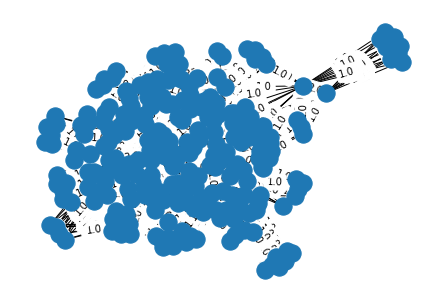

In [127]:
#Creating the weighted network graph
import networkx as nx
Graph=nx.from_numpy_matrix(mat,parallel_edges=False)
pos=nx.spring_layout(Graph)
nx.draw(Graph,pos)
labels=nx.get_edge_attributes(Graph,'weight')
nx.draw_networkx_edge_labels(Graph,pos,edge_labels=labels)

In [128]:
 #Calculating and printing the weighted degree of nodes
 Graph.degree(weight='weight')

DegreeView({0: 48.0, 1: 20.0, 2: 9.0, 3: 11.0, 4: 9.0, 5: 21.0, 6: 11.0, 7: 11.0, 8: 9.0, 9: 9.0, 10: 9.0, 11: 9.0, 12: 29.0, 13: 31.0, 14: 9.0, 15: 9.0, 16: 18.0, 17: 9.0, 18: 37.0, 19: 9.0, 20: 20.0, 21: 42.0, 22: 9.0, 23: 10.0, 24: 9.0, 25: 10.0, 26: 9.0, 27: 9.0, 28: 85.0, 29: 9.0, 30: 30.0, 31: 9.0, 32: 9.0, 33: 9.0, 34: 16.0, 35: 26.0, 36: 9.0, 37: 10.0, 38: 7.0, 39: 11.0, 40: 11.0, 41: 11.0, 42: 20.0, 43: 20.0, 44: 11.0, 45: 10.0, 46: 29.0, 47: 112.0, 48: 9.0, 49: 10.0, 50: 10.0, 51: 20.0, 52: 11.0, 53: 8.0, 54: 9.0, 55: 9.0, 56: 44.0, 57: 10.0, 58: 10.0, 59: 9.0, 60: 11.0, 61: 9.0, 62: 17.0, 63: 38.0, 64: 9.0, 65: 9.0, 66: 11.0, 67: 9.0, 68: 10.0, 69: 9.0, 70: 57.0, 71: 36.0, 72: 19.0, 73: 14.0, 74: 9.0, 75: 31.0, 76: 19.0, 77: 11.0, 78: 21.0, 79: 11.0, 80: 11.0, 81: 9.0, 82: 9.0, 83: 11.0, 84: 9.0, 85: 27.0, 86: 30.0, 87: 11.0, 88: 11.0, 89: 4.0, 90: 11.0, 91: 11.0, 92: 18.0, 93: 11.0, 94: 9.0, 95: 9.0, 96: 35.0, 97: 19.0, 98: 22.0, 99: 84.0, 100: 19.0, 101: 49.0, 102: 59.0, 1

In [129]:
#Calculating and printing the degree of nodes
Graph.degree

DegreeView({0: 38, 1: 18, 2: 9, 3: 11, 4: 9, 5: 21, 6: 11, 7: 11, 8: 9, 9: 9, 10: 9, 11: 9, 12: 27, 13: 29, 14: 9, 15: 9, 16: 17, 17: 9, 18: 32, 19: 9, 20: 19, 21: 37, 22: 9, 23: 10, 24: 9, 25: 10, 26: 9, 27: 9, 28: 62, 29: 9, 30: 28, 31: 9, 32: 9, 33: 9, 34: 15, 35: 23, 36: 9, 37: 10, 38: 7, 39: 11, 40: 11, 41: 11, 42: 19, 43: 19, 44: 11, 45: 10, 46: 25, 47: 90, 48: 9, 49: 10, 50: 10, 51: 18, 52: 11, 53: 8, 54: 9, 55: 9, 56: 35, 57: 10, 58: 10, 59: 9, 60: 11, 61: 9, 62: 17, 63: 31, 64: 9, 65: 9, 66: 11, 67: 9, 68: 10, 69: 9, 70: 46, 71: 31, 72: 18, 73: 14, 74: 9, 75: 27, 76: 16, 77: 11, 78: 19, 79: 11, 80: 11, 81: 9, 82: 9, 83: 11, 84: 9, 85: 26, 86: 27, 87: 11, 88: 11, 89: 4, 90: 11, 91: 11, 92: 17, 93: 11, 94: 9, 95: 9, 96: 32, 97: 18, 98: 19, 99: 64, 100: 17, 101: 37, 102: 49, 103: 11, 104: 9, 105: 11, 106: 18, 107: 11, 108: 20, 109: 20, 110: 16, 111: 11, 112: 11, 113: 18, 114: 24, 115: 32, 116: 20, 117: 25, 118: 9, 119: 20, 120: 18, 121: 20, 122: 10, 123: 19, 124: 17, 125: 9, 126:

In [130]:
#calculating the total degree and total strength for each keyword(node)
strength=[]
degree=[]
for k,v in Graph.degree:
  degree.append(v)
for k,v in Graph.degree(weight='weight'):
  strength.append(v)

In [131]:
#printing the final dataframe 
Final_df=pd.DataFrame(columns=['Keyword','Degree','Strength'])
Final_df['Keyword']=key_set
Final_df['Degree']=degree
Final_df['Strength']=strength
Final_df

,Keyword,Degree,Strength
0,AGENCY THEORY,38,48.0
1,AGGRESSION (PSYCHOLOGY),18,20.0
2,AMBIVALENCE,9,9.0
3,ANGER IN THE WORKPLACE,11,11.0
4,BEHAVIORAL RESEARCH,9,9.0
...,...,...,...
243,WORK & FAMILY,9,9.0
244,WORK ATTITUDES,11,11.0
245,WORK ENVIRONMENT,26,31.0
246,WORK ENVIRONMENT -- PSYCHOLOGICAL ASPECTS,10,10.0


In [132]:
# Displaying the top 10 Keywords(nodes) by Degree
Final_df.sort_values(by='Degree',ascending=False).drop('Strength',axis=1).head(10)

,Keyword,Degree
154,ORGANIZATIONAL BEHAVIOR,166
157,ORGANIZATIONAL EFFECTIVENESS,104
135,MANAGEMENT SCIENCE,102
169,PERSONNEL MANAGEMENT,93
47,DECISION MAKING,90
162,ORGANIZATIONAL STRUCTURE,74
161,ORGANIZATIONAL SOCIOLOGY,66
220,STRATEGIC PLANNING,66
99,INDUSTRIAL MANAGEMENT,64
28,CORPORATE GOVERNANCE,62


In [133]:
#Displaying the top 10 Keywords(nodes) by Strength
Final_df.sort_values(by='Strength',ascending=False).drop('Degree',axis=1).head(10)

,Keyword,Strength
154,ORGANIZATIONAL BEHAVIOR,265.0
157,ORGANIZATIONAL EFFECTIVENESS,144.0
135,MANAGEMENT SCIENCE,136.0
169,PERSONNEL MANAGEMENT,126.0
47,DECISION MAKING,112.0
162,ORGANIZATIONAL STRUCTURE,107.0
161,ORGANIZATIONAL SOCIOLOGY,96.0
28,CORPORATE GOVERNANCE,85.0
99,INDUSTRIAL MANAGEMENT,84.0
220,STRATEGIC PLANNING,80.0


In [134]:
adj_df

,AGENCY THEORY,AGGRESSION (PSYCHOLOGY),AMBIVALENCE,ANGER IN THE WORKPLACE,BEHAVIORAL RESEARCH,BOARDS OF DIRECTORS,BREAK-EVEN ANALYSIS,BURNOUT (PSYCHOLOGY),BUSINESS COMMUNICATION,BUSINESS ENTERPRISES,...,VIOLENCE IN THE WORKPLACE,WAGE PAYMENT SYSTEMS,WAGES,WOMEN -- EMPLOYMENT,WOMEN EMPLOYEES,WORK & FAMILY,WORK ATTITUDES,WORK ENVIRONMENT,WORK ENVIRONMENT -- PSYCHOLOGICAL ASPECTS,WORKFLOW
AGENCY THEORY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGGRESSION (PSYCHOLOGY),0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0
AMBIVALENCE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ANGER IN THE WORKPLACE,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
BEHAVIORAL RESEARCH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WORK & FAMILY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
WORK ATTITUDES,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
WORK ENVIRONMENT,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
WORK ENVIRONMENT -- PSYCHOLOGICAL ASPECTS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
# Taking top 40 node values with maximum weights
largest=dict(adj_df.max().nlargest(40))

In [136]:
#printing the largest dictionary
largest

{'ORGANIZATIONAL BEHAVIOR': 11.0,
 'ORGANIZATIONAL EFFECTIVENESS': 11.0,
 'ORGANIZATIONAL STRUCTURE': 9.0,
 'PERSONNEL MANAGEMENT': 8.0,
 'MANAGEMENT SCIENCE': 7.0,
 'CORPORATE GOVERNANCE': 6.0,
 'DECISION MAKING': 6.0,
 'ORGANIZATIONAL SOCIOLOGY': 6.0,
 'INDUSTRIAL MANAGEMENT': 5.0,
 'INDUSTRIAL RELATIONS': 5.0,
 'MANAGEMENT': 5.0,
 'ORGANIZATIONAL CHANGE': 5.0,
 'TEAMS IN THE WORKPLACE': 5.0,
 'AGENCY THEORY': 4.0,
 'EXECUTIVE ABILITY (MANAGEMENT)': 4.0,
 'STRATEGIC PLANNING': 4.0,
 'DECENTRALIZATION IN MANAGEMENT': 3.0,
 'EMPLOYEE MOTIVATION': 3.0,
 'INDUSTRIAL PSYCHOLOGY': 3.0,
 'LEADERSHIP': 3.0,
 'ORGANIZATIONAL RESEARCH': 3.0,
 'PERFORMANCE': 3.0,
 'RESEARCH & DEVELOPMENT': 3.0,
 'AGGRESSION (PSYCHOLOGY)': 2.0,
 'BUSINESS NETWORKS': 2.0,
 'BUSINESS PLANNING': 2.0,
 'CAPITALISTS & FINANCIERS': 2.0,
 'CHIEF EXECUTIVE OFFICERS': 2.0,
 'COMPENSATION MANAGEMENT': 2.0,
 'COMPETITIVE ADVANTAGE': 2.0,
 'CORPORATIONS -- FINANCE': 2.0,
 'CREATIVE ABILITY': 2.0,
 'CREATIVE ABILITY IN BUSIN

In [137]:
#creating a dataframe to display the required result
word_pair=pd.DataFrame(columns=['Keyword1','Keyword2','weight'])

In [138]:
#getting the keyword1 and keyword2 for the node pair dataframe
key1=[]
nodeweight=[]
for k,v in largest.items():
  key1.append(k)
  nodeweight.append(v)
key2=[]
for k,v in largest.items():
  key2.append(adj_df[adj_df[k].where(adj_df[k]==v).notnull()].index[0])

In [139]:
#making the columns in the dataframe pair_wor
word_pair['Keyword1']=key1
word_pair['Keyword2']=key2
word_pair['weight']=nodeweight

In [140]:
# Displaying the top 10 node pairs by weight.
word_pair = word_pair.loc[pd.DataFrame(np.sort(word_pair[['Keyword1','Keyword2']],1),index=word_pair.index).drop_duplicates(keep='first').index].reset_index()
word_pair = word_pair.drop('index', axis = 1)
word_pair.head(10)

,Keyword1,Keyword2,weight
0,ORGANIZATIONAL BEHAVIOR,ORGANIZATIONAL EFFECTIVENESS,11.0
1,ORGANIZATIONAL STRUCTURE,ORGANIZATIONAL BEHAVIOR,9.0
2,PERSONNEL MANAGEMENT,ORGANIZATIONAL BEHAVIOR,8.0
3,MANAGEMENT SCIENCE,ORGANIZATIONAL BEHAVIOR,7.0
4,CORPORATE GOVERNANCE,ORGANIZATIONAL BEHAVIOR,6.0
5,DECISION MAKING,ORGANIZATIONAL BEHAVIOR,6.0
6,ORGANIZATIONAL SOCIOLOGY,ORGANIZATIONAL BEHAVIOR,6.0
7,INDUSTRIAL MANAGEMENT,ORGANIZATIONAL BEHAVIOR,5.0
8,INDUSTRIAL RELATIONS,ORGANIZATIONAL BEHAVIOR,5.0
9,MANAGEMENT,ORGANIZATIONAL BEHAVIOR,5.0


In [141]:
#Printing the Final_df
Final_df

,Keyword,Degree,Strength
0,AGENCY THEORY,38,48.0
1,AGGRESSION (PSYCHOLOGY),18,20.0
2,AMBIVALENCE,9,9.0
3,ANGER IN THE WORKPLACE,11,11.0
4,BEHAVIORAL RESEARCH,9,9.0
...,...,...,...
243,WORK & FAMILY,9,9.0
244,WORK ATTITUDES,11,11.0
245,WORK ENVIRONMENT,26,31.0
246,WORK ENVIRONMENT -- PSYCHOLOGICAL ASPECTS,10,10.0


Text(0.5, 0, 'Degree')

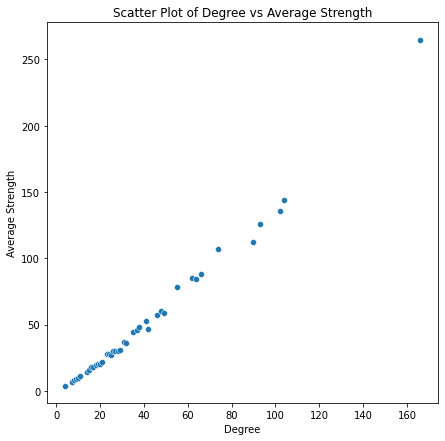

In [142]:
# Degree vs Average Strength.
plot=Final_df.groupby('Degree').mean()
plt.figure(figsize=(7,7))
sns.scatterplot(data=plot,x=plot.index,y='Strength')
plt.ylabel('Average Strength')
plt.title('Scatter Plot of Degree vs Average Strength')
plt.xlabel('Degree')